In [9]:
import cv2
import numpy as np
from PIL import Image

image_num="000072"
img_file = f"logs/segmentation_results/{image_num}_image.png"
#img = cv2.imread().astype(np.float32)
img = Image.open(img_file)
np_img = np.asarray(img)
np_img = np_img.reshape((1,*np_img.shape))

In [10]:
np_img.shape

(1, 120, 160, 3)

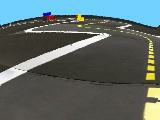

In [11]:
img

In [12]:
import onnxruntime as ort
sess_ort = ort.InferenceSession("./output/segmentation.onnx")
import time
start = time.time()
qty = 10
for i in range(0,10):
    res = sess_ort.run(output_names=["output:0"], input_feed={"input_rgb:0": np_img.astype(np.float32)})
end = time.time()
delta=end-start
seg = res[0].astype(np.uint8).reshape(120,160)
print(f"Average frame rate: {1/(delta/qty)}")


Average frame rate: 17.412797021523215


In [13]:
seg.shape

(120, 160)

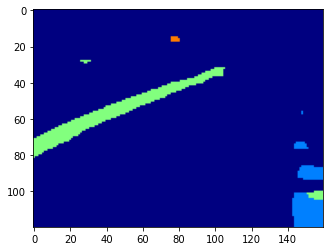

In [14]:
from cv2_plt_imshow import cv2_plt_imshow
#seg = cv2.imread(f"logs/segmentation_results/{image_num}_raw_prediction.png",cv2.IMREAD_GRAYSCALE)
#seg = cv2.transpose(seg.astype(np.uint8).reshape(160,120))
yellow = (seg==1).astype(np.uint8)
white = (seg==2).astype(np.uint8)
cv2_plt_imshow(cv2.applyColorMap(seg*64, cv2.COLORMAP_JET))

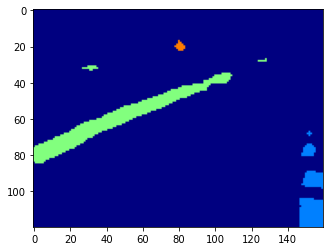

In [15]:
from cv2_plt_imshow import cv2_plt_imshow
seg = cv2.imread(f"logs/segmentation_results/{image_num}_raw_prediction.png",cv2.IMREAD_GRAYSCALE)
#eg = seg.astype(np.uint8).reshape(120,160)
yellow = (seg==1).astype(np.uint8)
white = (seg==2).astype(np.uint8)
cv2_plt_imshow(cv2.applyColorMap(seg*64, cv2.COLORMAP_JET))